In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load ORIGINAL dataset (before any preprocessing)
data = pd.read_csv("predictive_maintenance.csv")  # Your raw data
print("Original data loaded. Shape:", data.shape)
display(data.head(2))

Original data loaded. Shape: (10000, 10)


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure


In [8]:
# 1. Temperature difference (process vs. air)
data['temp_diff'] = data['Process temperature [K]'] - data['Air temperature [K]']

# 2. Power (rotational speed * torque)
data['power'] = data['Rotational speed [rpm]'] * data['Torque [Nm]']

# 3. Tool wear rate (wear per minute - placeholder)
data['wear_rate'] = data['Tool wear [min]'] / 1000  # Example: assume 1000 mins operational time

print("New features created:")
display(data[['temp_diff', 'power', 'wear_rate']].head())

New features created:


,temp_diff,power,wear_rate
0,10.5,66382.8,0.000
1,10.5,65190.4,0.003
2,10.4,74001.2,0.005
3,10.4,56603.5,0.007
4,10.5,56320.0,0.009


In [9]:
# 1. Extract machine type prefix (e.g., 'M' from 'M14860')
data['machine_type'] = data['Product ID'].str[0]

# 2. Bin tool wear into categories
data['wear_bin'] = pd.cut(data['Tool wear [min]'], 
                         bins=[0, 50, 100, 150, 200, 250],
                         labels=['0-50', '51-100', '101-150', '151-200', '201-250'])

print("\nCategorical features:")
display(data[['machine_type', 'wear_bin']].head())


Categorical features:


,machine_type,wear_bin
0,M,NaN
1,L,0-50
2,L,0-50
3,L,0-50
4,L,0-50


In [10]:
# Sort by UDI (assuming it represents time order)
data = data.sort_values('UDI')

# Create lagged features (previous row values)
data['lag_torque'] = data['Torque [Nm]'].shift(1)
data['lag_rpm'] = data['Rotational speed [rpm]'].shift(1)

# Fill NaN for first row
data.fillna(method='bfill', inplace=True)

print("\nLagged features:")
display(data[['UDI', 'Torque [Nm]', 'lag_torque', 'Rotational speed [rpm]', 'lag_rpm']].head(3))


Lagged features:


,UDI,Torque [Nm],lag_torque,Rotational speed [rpm],lag_rpm
0,1,42.8,42.8,1551,1551.0
1,2,46.3,42.8,1408,1551.0
2,3,49.4,46.3,1498,1408.0


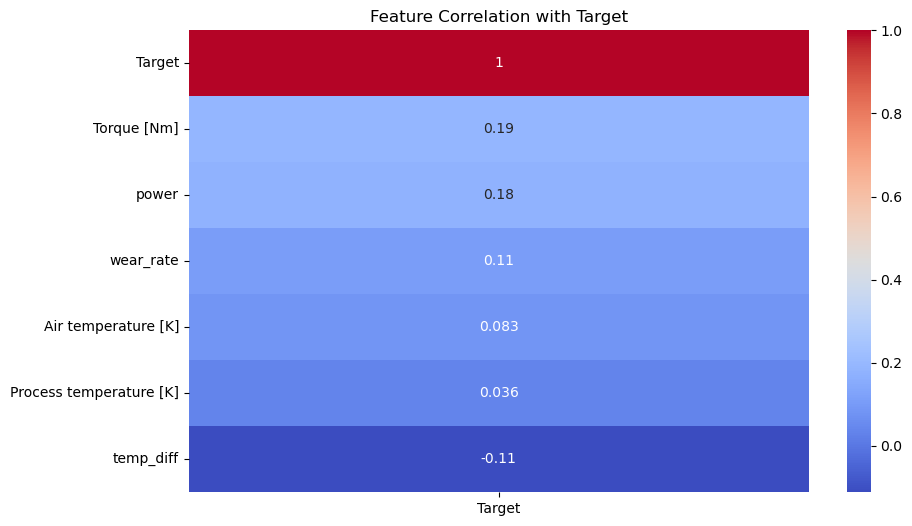

In [11]:
# Select engineered + original features
features = ['temp_diff', 'power', 'wear_rate', 'machine_type', 'wear_bin',
            'Air temperature [K]', 'Process temperature [K]', 'Torque [Nm]']

# Correlation with target
plt.figure(figsize=(10, 6))
corr_matrix = data[features + ['Target']].corr(numeric_only=True)
sns.heatmap(corr_matrix[['Target']].sort_values('Target', ascending=False), 
            annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Target")
plt.show()

In [12]:
# Save for Week 5 modeling
data.to_csv("engineered_data_week4.csv", index=False)
print("Engineered data saved!")

Engineered data saved!
